# Partial Differential Equations

There is a large array of physical phenomena that can be described by differential equations involving partial derivatives. Those equations are known as Partial Differential Equations (PDEs)


Here is a brief list of PDEs with its corresponding physics background:

* The Schroedinger Equation in 2D
$$
-\frac{\partial^2 u }{\partial x^2} -\frac{\partial^2 u}{\partial y^2} + f(x,y) u = i\frac{\partial u}{\partial t}
$$
where $u$ is the wave-function.

* Poission equation in 3D (classical gravity)
$$
\frac{\partial^2 u }{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial x^2} = -4\pi\rho(x,y,z)
$$
where $u$ is the gravitational potential and $\rho$ is an arbitrary density distribution.

* Difussion equation (1D)
$$
\frac{\partial^2 u}{\partial x^2}= A\frac{\partial u}{\partial t}
$$
where $u$ could be for instance a scalar field representing heat and $A$ is known as the difussion constant.

* Wave equation (2D)
$$
\frac{\partial^2 u }{\partial x^2} + \frac{\partial^2 u}{\partial y^2}=A\frac{\partial^2 u}{\partial t^2}
$$

There are many different methods to solve these equations such as finite elements or spectral methods, which can include Fourier Transform methods. In this section we will focus on the Finite Differences Method.


# Finite differences

The concept behind the finite differences method is the same equal-step logic we have applied so far in ODE. We discretize the spatial and temporal variables into 'deltas' that can be used to define the functions and derivatives we need.

## Diffusion equation

Take for instance the 1D diffusion equation
$$
\frac{\partial^2 u}{\partial x^2}=\frac{\partial u}{\partial t}
$$

Using the first term of the Taylor series one can approximate the derivatives as:


$$
\frac{\partial u}{\partial t} \approx \frac{u(x,t+\Delta t) - u(x,t)}{\Delta t}
$$

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x+\Delta x,t) - 2 u(x,t) + u(x-\Delta x,t)}{(\Delta x)^2}
$$

If now we define that space in the region $0<x<L$ is discretized into $N+1$ points with spacing $\Delta x$ and time is disretized into $M$ points spaced by $\Delta t$ for $t>0$, we can define a series of points 

$$
t_{j}=j\Delta t\ \ j\geq 0
$$

$$
x_{i} = i\Delta x\ \ 0\leq i\leq N
$$

such that the derivatives are now rewriten as

$$
\frac{\partial u}{\partial t} \approx \frac{u(x_{i} ,t_{j+1}) - u(x_{i},t_{j})}{\Delta t}
$$

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x_{i+1},t_j) - 2 u(x_{i},t_j) + u(x_{i-1},t_j)}{(\Delta x)^2}
$$



We simplify further this equations by introducing a new notation where the upper script describes the time discretization and the lower script describes the space discretization.


$$
\frac{\partial u}{\partial t} \approx \frac{u_{i}^{j+1} - u_{i}^{j}}{\Delta t}
$$

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^j - 2 u_{i}^{j} + u_{i-1}^{j}}{(\Delta x)^2}
$$

We solve for $u_{i}^{j+1}$

$$
\frac{u_{i+1}^j - 2 u_{i}^{j} + u_{i-1}^{j}}{(\Delta x)^2} = \frac{u_{i}^{j+1} - u_{i}^{j}}{\Delta t}
$$

$$
u_{i}^{j+1} = \alpha u_{i+1}^{j} + (1 - 2\alpha)u_{i}^{j} + \alpha u_{i-1}^{j}
$$

where $\alpha = \Delta t/ (\Delta x)^2$.

To solve this we require initial conditions $u_{i}^{0} = g(x_i)$ and boundary conditions $u(0,t)= a(t)$, $u(L,t)=b(t)$. 

This is known as an explicit scheme that is very easy to implement. However it has a condition for numerical stability $\alpha<1/2$.

## Wave equation

We can use the same method to get a solution for the wave equation
$$
\frac{\partial^2 u}{\partial x^2}=c^2\frac{\partial^2 u}{\partial t^2}
$$

to get the following expression


$$
u_{i}^{j+1}= 2(1-r^2)u_{i}^{j} - u_{i}^{j-1} + r^2(u_{i+1}^{j} + u_{i-1}^j)
$$

where $r=c\Delta t/\Delta x$ and the stability condition is $r<1$.


Are we ready to solve this equation? Not quite. We also need an initial condition for the first time derivative, which can be put as 
$$
\frac{\partial u}{\partial t} (t=0) = \frac{u_{i}^{+1}- u_{i}^{-1}}{2\Delta t} = 0
$$

which gives a special condition for the first timestep:

$$
u_{i}^{1}=u_{i}^{0} + \frac{r^2}{2}(u_{i+1}^0 - 2u_{i}^0 + u_{i-1}^0)
$$

As in the previous case, the boundaries must also be fixed to some known value $u_{0}^{j}=a$, $u_{N}=0$. The ends can also be considered to be free, in which case $u_{0}^{j}=u_{1}$ and $u_{N}^{j}=u_{N-1}^{j}$

## Example : Solving the 1D wave equation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
n_points = 1000
x = linspace(0.0,1.0,n_points)
u_initial = exp(-((x-0.3)*(x-0.3))/0.01)

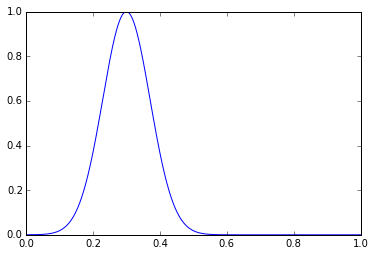

In [3]:
plot(x,u_initial)

In [4]:
#find the first iteration for fixed boundary conditions
delta_x = x[1]-x[0]
delta_t = 0.0005
c = 1.0
r = c * delta_t / delta_x

print r # remember, this should be less than 1.0 for this scheme to work

#fixed boundary conditions
u_initial[0] = 0.0
u_initial[n_points-1] = 0.0

u_future = zeros(n_points)
u_future[0] = 0.0
u_future[n_points-1] = 0.0

for i in range(1,n_points-1):
    u_future[i] = u_initial[i] + (r**2/2.0) * (u_initial[i+1] - 2.0 * u_initial[i] + u_initial[i-1])

#create a new variable to hold the previous value
u_past = u_initial.copy()
#create a new variable to hold the present value
u_present = u_future.copy()

0.4995


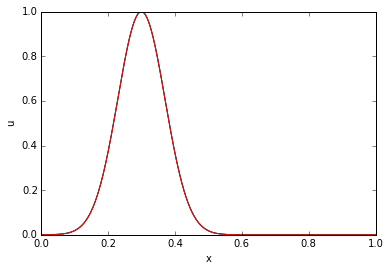

In [5]:
plot(x, u_initial)
plot(x, u_past)
plot(x, u_present)
plt.xlabel('x')
plt.ylabel('u')

In [6]:
#next iterations
n_time = 350
for j in range(n_time):
    for i in range(1,n_points-1):
        u_future[i] = (2.0*(1.0-r**2))*u_present[i] - u_past[i] + (r**2)*(u_present[i+1] +  u_present[i-1])
    u_past = u_present.copy()
    #create a new variable to hold the present value
    u_present = u_future.copy()

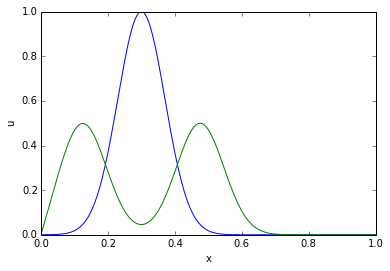

In [8]:
plot(x, u_initial)
plot(x, u_present)
plt.xlabel('x')
plt.ylabel('u')

# Exercise

1. Write a program in C to compute the solution of the 1D wave equation for the first 1000 iterations and a python program to visualize the time evolution. Use the same initial conditions as above. You might want to use this library https://github.com/ipython/ipywidgets

2. What should happen if you now use a sinus wave as the initial condition? Check your intution by solving numerically the equations.